In [217]:
!pip install -e ..
import nextbike as nb
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import geopandas 
from geopandas.tools import sjoin
import geoplot
import warnings
warnings.filterwarnings('ignore')

Obtaining file:///C:/Users/meikh/Dropbox/Programming%20Data%20Science/PDS_Herber
  Attempting uninstall: PDS-Herber
    Found existing installation: PDS-Herber 0.0.1
    Uninstalling PDS-Herber-0.0.1:
      Successfully uninstalled PDS-Herber-0.0.1
  Running setup.py develop for PDS-Herber


In [2]:
# Declare name of the first csv-file
csv_name = "dortmund"
# Load dataset
path_a = Path(os.getcwd()).parent
path=os.path.join(path_a, f'data\input\{csv_name}_preprocessed.csv')
df = nb.input_output.read_file(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242878 entries, 0 to 242877
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            242878 non-null  int64  
 1   p_spot_start          242878 non-null  int64  
 2   datetime_start        242878 non-null  object 
 3   b_number              242878 non-null  int64  
 4   p_uid_start           242878 non-null  int64  
 5   p_bikes_start         242878 non-null  int64  
 6   p_lat_start           242878 non-null  float64
 7   b_bike_type           242878 non-null  int64  
 8   p_name_start          242878 non-null  object 
 9   p_number_start        242878 non-null  int64  
 10  p_lng_start           242878 non-null  float64
 11  p_bike_start          242878 non-null  int64  
 12  p_spot_end            242878 non-null  int64  
 13  datetime_end          242878 non-null  object 
 14  p_uid_end             242878 non-null  float64
 15  

# Descriptive Statistics

### Duration per Month

In [3]:
reduced_df = df[['duration', 'month_start']]
pd.pivot_table(reduced_df, values='duration', index='month_start', aggfunc={'duration': [np.mean, np.std, max]})

,max,mean,std
month_start,,,
1,1067.0,65.337130,132.097966
2,1330.0,35.485086,94.348206
3,1385.0,41.207761,98.536873
4,1305.0,44.579629,99.816857
5,1275.0,52.117602,110.819237
6,1345.0,42.522168,96.241462
8,1348.0,34.757147,79.857753
9,943.0,19.833606,49.832261
10,1384.0,17.836654,44.529966


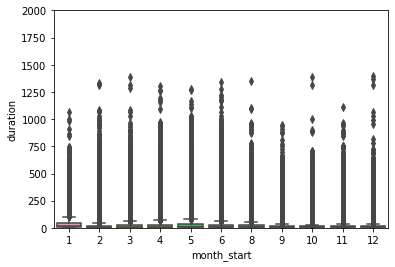

In [4]:
ax = sns.boxplot(x='month_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 2000))
plt.show(ax)

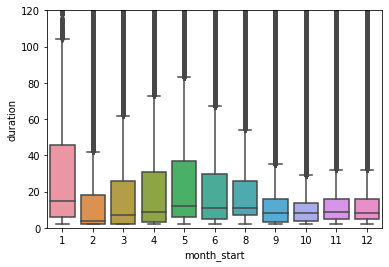

In [5]:
ax = sns.boxplot(x='month_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 120))
plt.show(ax)

Not looking at January, trip duration is highest during the summer months and shows a quadratic or cubic development over the year. January does not fit into this pattern by having the highest average duration which seems not to be caused by outliers. It remains unclear, whether the January 2019 observations are biased or due to real special circumstances, but in a multi-year dataset this month in this year would receive a dummy to account for this. This will be done here as well.

In [6]:
# datetime is a string again, convert it again to datetime format
df['datetime_start'] = df['datetime_start'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# Create a dummy for January 2019
df['january_19'] = df['datetime_start'].apply(lambda x: 1 if (x.month == 1 & x.year == 2019) else 0)

### Duration per Day of Week

In [7]:
reduced_df = df[['duration', 'day_of_week_start']]
pd.pivot_table(reduced_df, values='duration', index='day_of_week_start', aggfunc={'duration': [np.mean, np.std, max]})

,max,mean,std
day_of_week_start,,,
0,1317.0,28.306523,69.725544
1,1094.0,34.097058,82.818292
2,1368.0,30.908643,77.783246
3,1277.0,29.998247,76.658169
4,1330.0,31.611458,76.934791
5,1385.0,33.814241,87.703347
6,1399.0,29.549734,85.134242


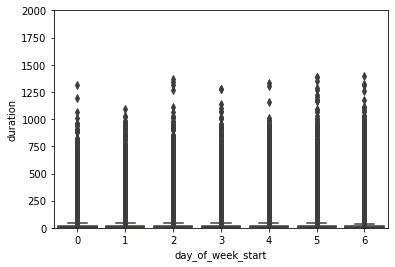

In [8]:
ax = sns.boxplot(x='day_of_week_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 2000))
plt.show(ax)

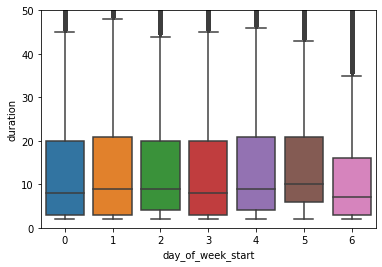

In [9]:
ax = sns.boxplot(x='day_of_week_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 50))
plt.show(ax)

The trip duration per day of the week does not show high differences between the days. Saturday shows the highest value while Sunday has the lowest. These two days will receive own dummies therefore.

In [10]:
# Create a dummies for Saturday and Sunday
df['saturday'] = df['day_of_week_start'].apply(lambda x: 1 if x == 5 else 0)
df['sunday'] = df['day_of_week_start'].apply(lambda x: 1 if x == 6 else 0)

### Duration per Hour of Day

In [11]:
reduced_df = df[['duration', 'hour_start']]
pd.pivot_table(reduced_df, values='duration', index='hour_start', aggfunc={'duration': [np.mean, np.std, max]})

,max,mean,std
hour_start,,,
0,1399.0,52.952400,155.781560
1,1348.0,53.392692,143.460109
2,1257.0,32.001027,118.416028
3,1154.0,23.583954,90.465210
4,1144.0,49.476168,141.474175
5,1100.0,63.048385,132.277420
6,1029.0,54.497066,121.681233
7,1007.0,52.777766,112.993470
8,947.0,41.992326,94.387003


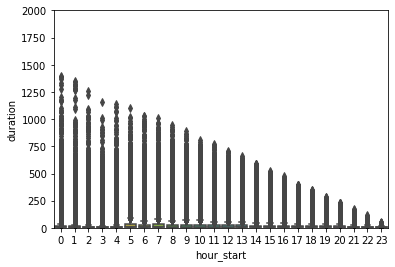

In [12]:
ax = sns.boxplot(x='hour_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 2000))
plt.show(ax)

That this dataset only includes trips which end at the same day as they started was already discussed at the end of the last notebook. 

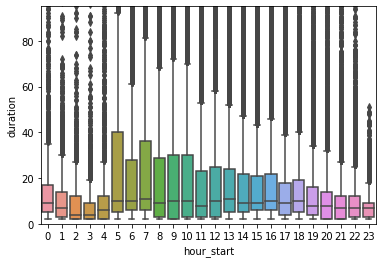

In [13]:
ax = sns.boxplot(x='hour_start', y='duration', data=reduced_df)
ax.set(ylim=(0, 95))
plt.show(ax)

Trip duration is lowest at night, with a sharp increase in the early morning. It is likely that the trip duration will be modelled well by the time of the day with a polynomial function.

### Duration by bike type

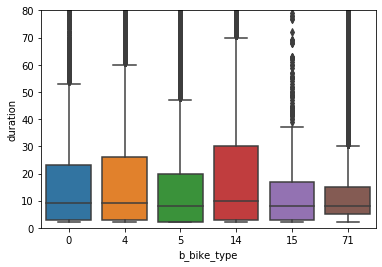

In [235]:
ax = sns.boxplot(x='b_bike_type', y='duration', data=df)
ax.set(ylim=(0, 80))
plt.show(ax)

The data contains different bike types and they seem to be associated with the trip duration.

# Visualizations with Georeferenced Data

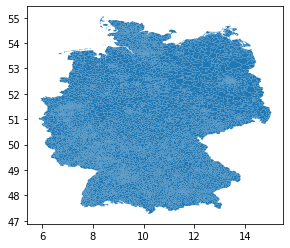

In [109]:
# Load PLZ numbers
plz_path = os.path.join(path_a, "data\input\plz-gebiete\plz-gebiete.shp")
plz_geo_df = geopandas.read_file(plz_path)
# Choose projection
plz_geo_df.crs = 'EPSG:25832'
plz_geo_df.plot()

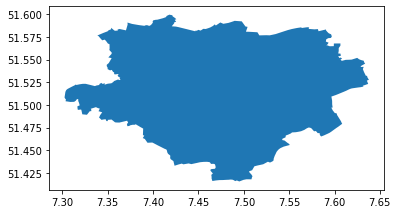

In [110]:
# Load boundaries of Dortmund
dortmund_path = os.path.join(path_a, "data\input\Dortmund\landkreise-in-germany.shp")
dortmund_geo_df = geopandas.read_file(dortmund_path)
dortmund_geo_df = dortmund_geo_df[['geometry']]
dortmund_geo_df.crs = 'EPSG:25832'
ax = dortmund_geo_df.plot()

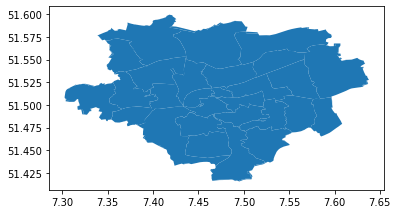

In [111]:
# Intersect the postal codes with the boundaries of Dortmund
plz_geo_df = geopandas.overlay(dortmund_geo_df, plz_geo_df, how='intersection')
plz_geo_df.drop(['note'], axis = 1, inplace = True)
plz_geo_df.plot()

In [125]:
# Create geometric starting points and connect to the plz data
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.p_lng_start, df.p_lat_start))
gdf.crs = 'EPSG:25832'
gdf = gdf.rename(columns={'geometry': 'point_start'}).set_geometry('point_start')
# Remove starting points outside Dortmund
gdf = sjoin(gdf, plz_geo_df, op='within')
gdf.drop(['index_right'], axis = 1, inplace = True)
gdf.rename(columns={'plz':'plz_start'}, inplace=True)
# The same for the end of the trips
gdf = geopandas.GeoDataFrame(gdf, geometry=geopandas.points_from_xy(gdf.p_lng_end, gdf.p_lat_end))
gdf.crs = 'EPSG:25832'
gdf = gdf.rename(columns={'geometry': 'point_end'}).set_geometry('point_end')
gdf = sjoin(gdf, plz_geo_df, op='within')
gdf.drop(['index_right'], axis = 1, inplace = True)
gdf.rename(columns={'plz':'plz_end'}, inplace=True)
# Set the geometry back to the starting points
gdf = gdf.set_geometry('point_start')

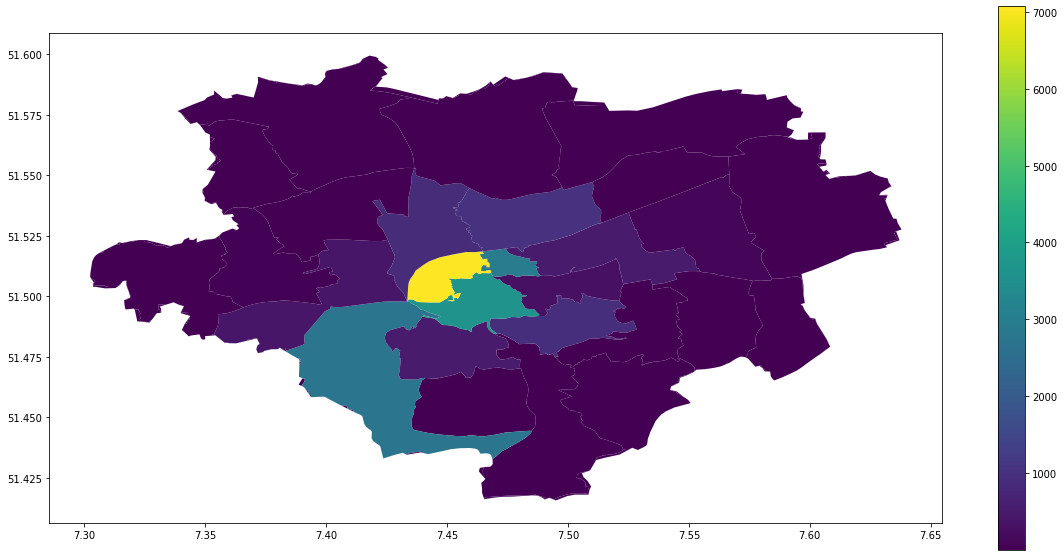

In [236]:
# Choropleth of started trips per plz region in May 2019
may_plz = (gdf['plz_start'][gdf.month_start == 5].value_counts()).to_frame()
may_plz = pd.merge(plz_geo_df, may_plz, how='left', left_on='plz', right_index=True)
may_plz.plot(column='plz_start', legend=True, figsize=(20, 10))

In May 2019 almost all trips in Dortmund started in or around the city centre.

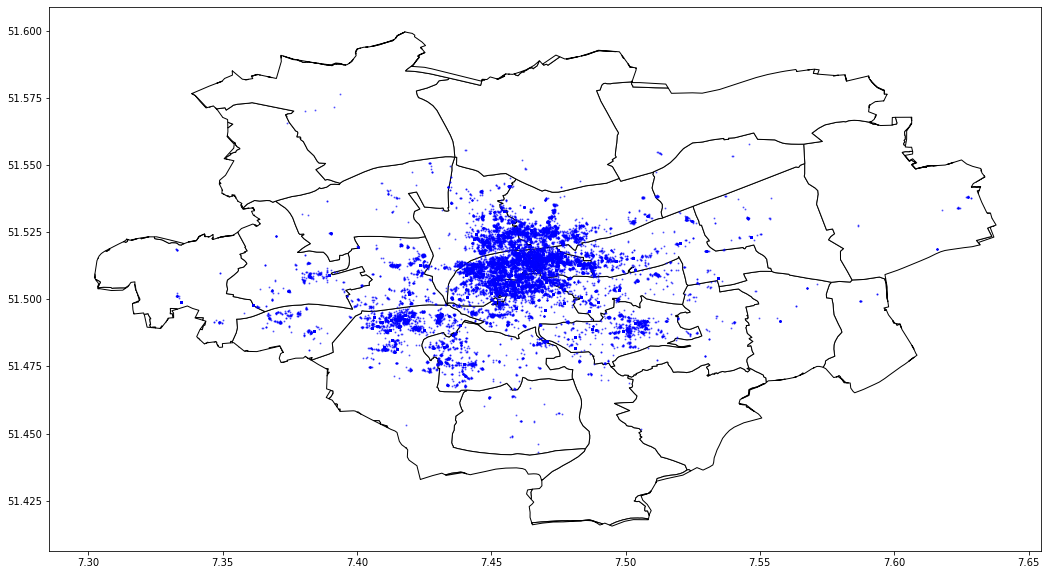

In [129]:
# Show all bike stations
base = plz_geo_df.plot(color='white', edgecolor='black', figsize=(20, 10))
gdf.plot(ax=base, marker='o', color='blue', markersize=1, alpha=0.5)

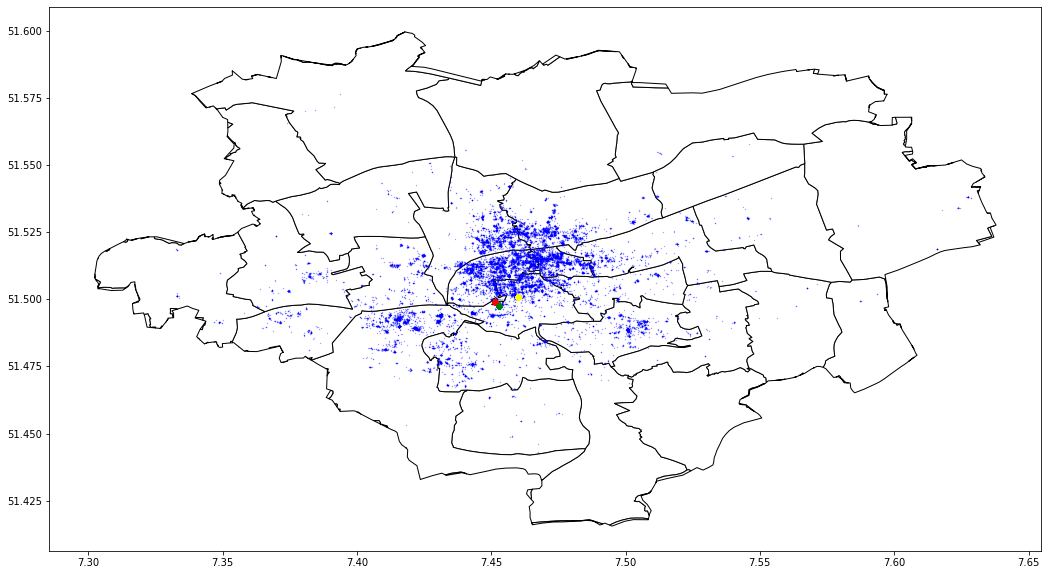

In [133]:
# Check whether p_number is clustering bike stations
base = plz_geo_df.plot(color='white', edgecolor='black', figsize=(20, 10))
gdf[gdf.p_number_start == 0].plot(ax=base, marker='o', color='blue', markersize=0.1, alpha=0.5)
gdf[gdf.p_number_start == 7300].plot(ax=base, marker='o', color='red', markersize=20)
gdf[gdf.p_number_start == 7350].plot(ax=base, marker='o', color='yellow', markersize=20)
gdf[gdf.p_number_start == 7729].plot(ax=base, marker='o', color='green', markersize=20)

In [135]:
# Check if the p_numbers are associated with only one station name
print(gdf['p_name_start'][gdf.p_number_start == 7350].unique(), 
      gdf['p_name_start'][gdf.p_number_start == 7300].unique(), 
      gdf['p_name_start'][gdf.p_number_start == 7729].unique())

['Polizeipräsidium'] ['Steigenberger Hotel / Berswordtstr.'] ['DEKT - Westfalenhallen']


It seems that my assumptions on p_number were wrong. Every p_number stands for a bike station, except for p_number 0 which includes all cases where a start or end is not associated with a bike station.

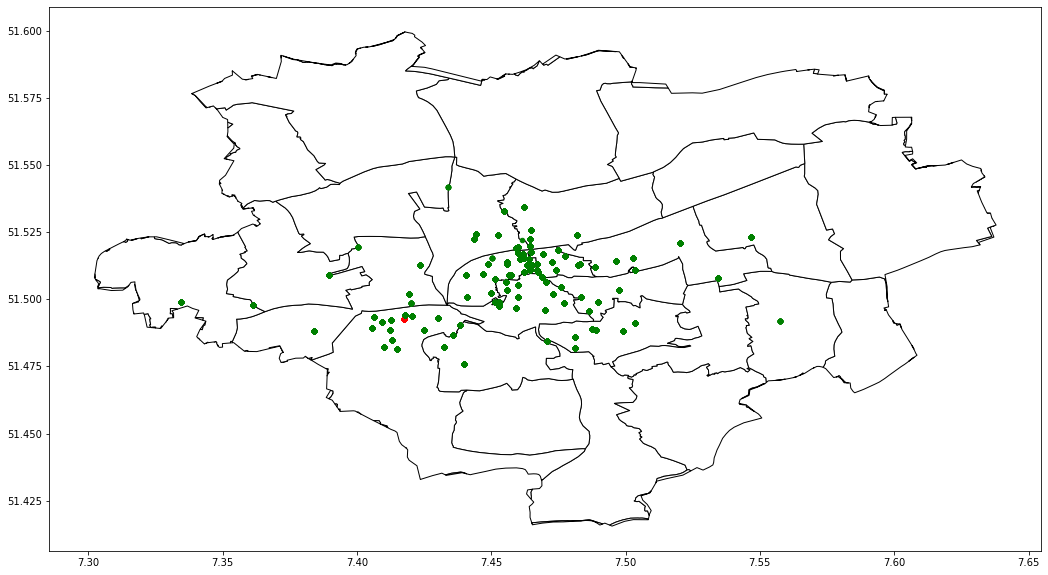

In [136]:
# Show bike stations and mark the university red
base = plz_geo_df.plot(color='white', edgecolor='black', figsize=(20, 10))
gdf[gdf.p_name_start == 'Universität/S-Bahnhof'].plot(ax=base, marker='o', color='red', markersize=20)
gdf[(gdf.p_name_start != 'Universität/S-Bahnhof') & (gdf.p_number_start != 0)].plot(ax=base, marker='o', color='green', markersize=20)

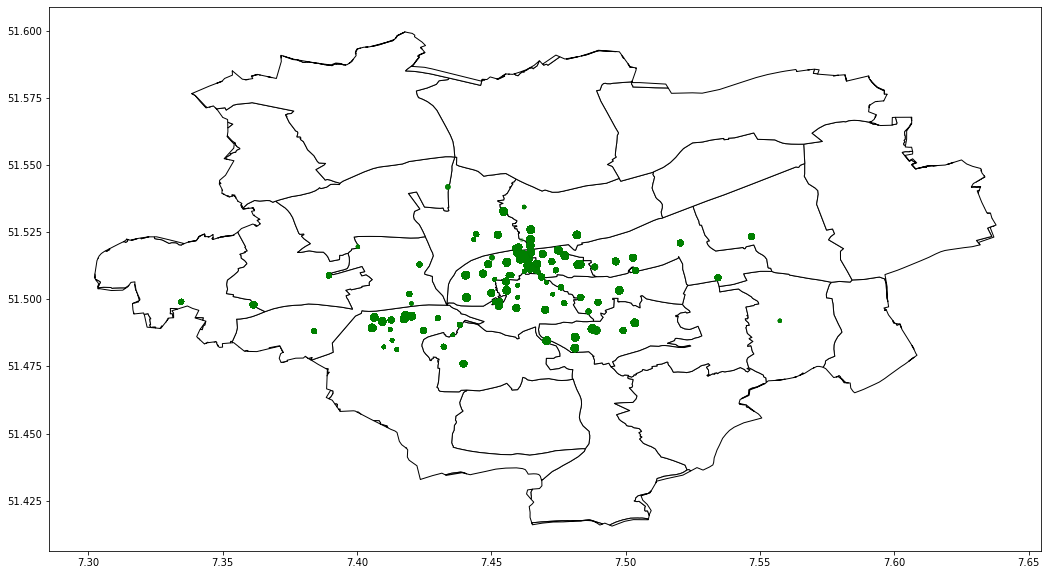

In [211]:
# Calculate the number of bikes at bike stations on 01.05.2019 at 12 AM.
gdf.reset_index(drop=True, inplace=True)
stations = gdf['p_number_start'].unique()
stations_frame = pd.Series(stations).to_frame()
stations_frame['bikes'] = np.nan
stations_frame = stations_frame.rename(columns={0: 'station'})
stations = stations.tolist()
stations.remove(0)
i = 0
while (i<=439): # These are the observations until the 1st May
    stations_frame['bikes'][stations_frame.station == gdf.p_number_end[i]] = gdf.p_bikes_end[i]
    if(gdf.p_number_end[i] in stations): stations.remove(gdf.p_number_end[i])
    i = i+1
while (stations):
    if(gdf.p_number_start[i] in stations):
        stations_frame['bikes'][stations_frame.station == gdf.p_number_start[i]] = gdf.p_bikes_start[i]
        stations.remove(gdf.p_number_start[i])
    i = i+1
# Merge with the main dataset and plot it
may_stations = pd.merge(gdf[['p_number_start', 'point_start']][gdf.p_number_start!=0], stations_frame, how='left', left_on='p_number_start', right_on='station')
base = plz_geo_df.plot(color='white', edgecolor='black', figsize=(20, 10))
base.set_xlim(7.32, 7.57)
base.set_ylim(51.47, 51.55)
may_stations.plot(ax=base, marker='o', color='green', markersize=may_stations['bikes']*10)

This is by far not the sexiest possible visualization, but the sizes of the points show how many bikes were at every station on May 1st.

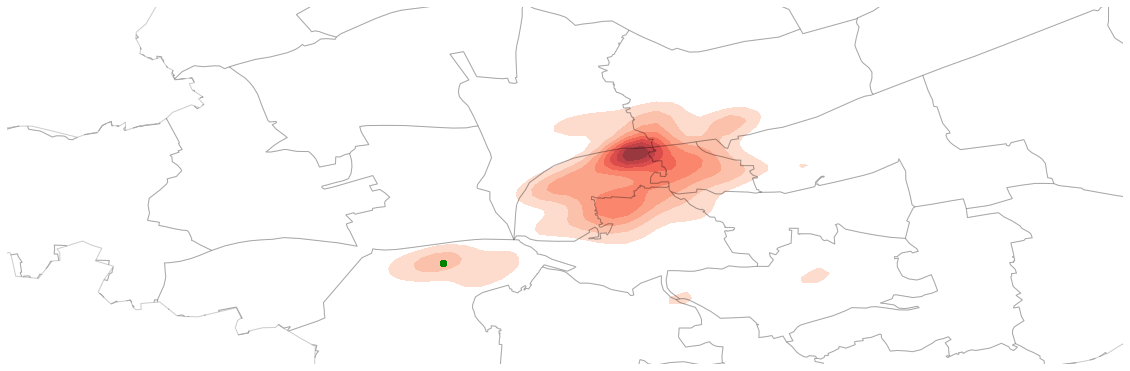

In [232]:
## Compare starting areas at different daytimes in heatmaps (the university is at the green point)
# Here: between 7 and 8 AM
base = geoplot.kdeplot(gdf['point_start'][gdf.hour_start == 7], cmap='Reds', shade=True, shade_lowest=False, figsize=(20, 10))
base.set_xlim(7.32, 7.57)
base.set_ylim(51.47, 51.55)
plz_geo_df.plot(ax=base, color='white', edgecolor='black', alpha=0.2)
gdf[gdf.p_name_start == 'Universität/S-Bahnhof'].plot(ax=base, marker='o', color='green', markersize=30)

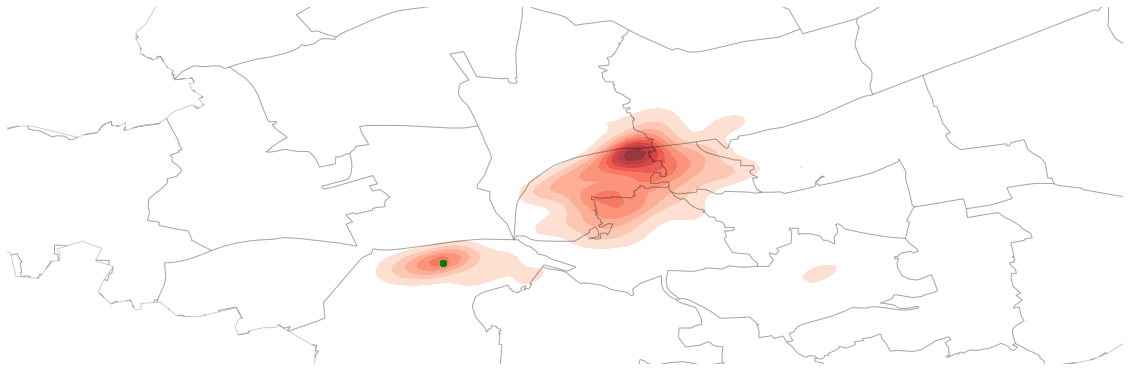

In [231]:
# Here: between 4 and 5 PM
base = geoplot.kdeplot(gdf['point_start'][gdf.hour_start == 16], cmap='Reds', shade=True, shade_lowest=False, figsize=(20, 10))
base.set_xlim(7.32, 7.57)
base.set_ylim(51.47, 51.55)
plz_geo_df.plot(ax=base, color='white', edgecolor='black', alpha=0.2)
gdf[gdf.p_name_start == 'Universität/S-Bahnhof'].plot(ax=base, marker='o', color='green', markersize=30)

A comparison of the two heatmaps reveals that starts of bike trips are in the afternoon more concentrated at the university than in the morning. 

# Rest

In [ ]:
# Data cleaning

In [ ]:
# train-test split

In [ ]:
df.pivot_table(columns='p_number', aggfunc='mean')

In [ ]:
if('datetime' in df.columns):
    if(type(df['datetime'][0])==str):